# Описание задачи

Футбол - это игра миллионов. Вот и я с самого детства являюсь футбольным болельщиком. Так же я делаю ставки на спорт и мне всегда хотелось выигрывать деньги, поэтому в данной работе будут предприняты основные шаги по разработке модели, которая прогнозирует результаты матчей в моей любимой Bundesliga за 1993-2018 года

Этот набор данных содержит результаты всех матчей Бундеслиги с 1993-1994 по 2017-2018 годы. В него также включены результаты тайма, но только с 1995-96 по 2017-18 годы. Столбцы включают дивизион (обозначается как D1), домашнюю команду, выездную команду, FTHG (голы в финальном тайме дома), FTAG (голы в финальном тайме на выезде), FTR (результат в основное время), HTHG (голы в перерыве), HTAG (голы в перерыве на выезде), HTR (результат в перерыве) и сезон.
    
Для определения победителя нужно выполнить классификацию признака FTR, которая является результатом игры футбольных команд (H - победа хозяев поля, А - победа гостей , D - ничья).


# Чтение данных

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv("./Bundesliga_Results.csv")
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [3]:
data.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18
7649,D1,12/5/2018,Wolfsburg,FC Koln,4,1,H,1.0,1.0,D,2017-18


In [4]:
data.shape

(7650, 11)

удалю не нужные признаки в датасете

In [5]:
data.drop(['Div', 'Season'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

data['FTR'].value_counts()

H    3587
A    2099
D    1964
Name: FTR, dtype: int64

In [6]:
data.shape

(7650, 9)

# Обработка пропущенных значений

Смотрю сколько всего пропущенных значений в каждом столбце датасета

In [7]:
data.isna().sum()

Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        612
HTAG        612
HTR         612
dtype: int64

Таким образом в dataset содержится данные с пропущенными значениями. Заполним пропущенные значения медианами, которые соответствуют числовым признакам.
Помимо этого у нас есть один категориальный признак: HTR - заполним его модой.

In [8]:
data.fillna(data.median(axis=0, numeric_only=True), axis=0 , inplace=True)
data['HTR'].fillna(data['HTR'].mode().iloc[0], inplace=True)

In [9]:
data.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
dtype: int64

Работа с выбросами

In [10]:
data['FTHG']

0       3
1       2
2       2
3       0
4       5
       ..
7645    3
7646    3
7647    1
7648    1
7649    4
Name: FTHG, Length: 7650, dtype: int64

In [11]:
data['FTAG']

0       1
1       1
2       2
3       2
4       2
       ..
7645    1
7646    2
7647    2
7648    0
7649    1
Name: FTAG, Length: 7650, dtype: int64

In [12]:
data['HTHG']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7645    1.0
7646    2.0
7647    1.0
7648    1.0
7649    1.0
Name: HTHG, Length: 7650, dtype: float64

In [13]:
data['HTAG']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7645    0.0
7646    0.0
7647    1.0
7648    0.0
7649    1.0
Name: HTAG, Length: 7650, dtype: float64

В данном dataset нет выбросов

# Визуализация данных

In [14]:
data.describe()

,FTHG,FTAG,HTHG,HTAG
count,7650.000000,7650.000000,7650.000000,7650.000000
mean,1.660000,1.214771,0.749542,0.481830
std,1.332276,1.158288,0.821031,0.698875
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,9.000000,5.000000,5.000000


Выведу график корреляции для dataset

<AxesSubplot:>

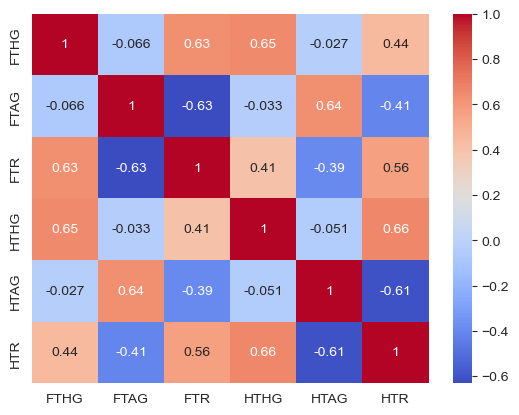

In [15]:
LE = LabelEncoder()
LE.fit(data['FTR'])
data['FTR'] = LE.transform(data['FTR'])
LE.fit(data['HTR'])
data['HTR'] = LE.transform(data['HTR'])
corr = data.corr()
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)

Из корреляционный матрицы видно, что сильных корреляций (> 0.5) есть.
Определим коррелирующие между собой признаки

In [16]:
corr = data.corr()
corr.where(np.triu(corr > 0.65, k=1)).stack()

FTHG  HTHG    0.654799
HTHG  HTR     0.659580
dtype: float64

Посмотрим, сбалансированы ли наши данные

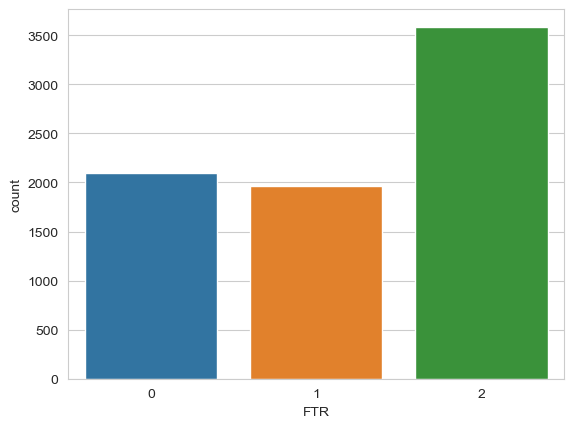

In [17]:
sns.countplot(x='FTR', data=data);

Text(0.5, 1.0, 'all bundesliga games')

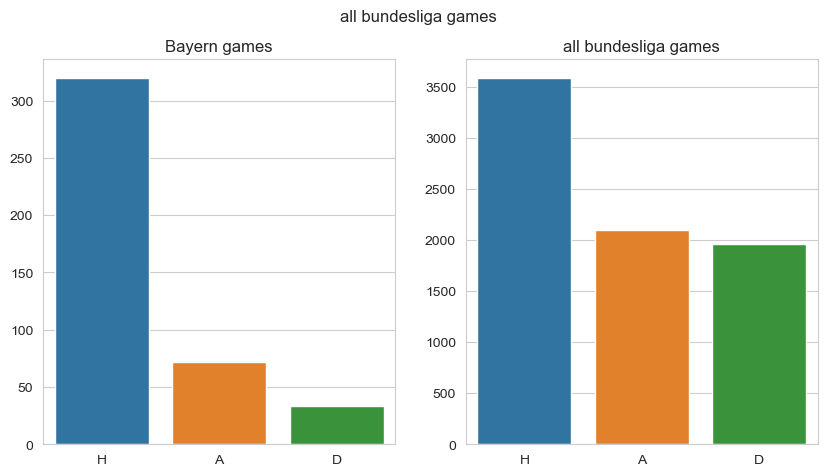

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
fig.suptitle('all bundesliga games')

table = data['FTR'].replace({0: 'A', 1: 'D', 2: 'H'})

all_ftr = table.value_counts()
bayern_ftr = table[data.HomeTeam == 'Bayern Munich'].value_counts()

sns.barplot(ax=axes[0], x=bayern_ftr.index, y=bayern_ftr.values)
axes[0].set_title('Bayern games')

sns.barplot(ax=axes[1], x=all_ftr.index, y=all_ftr.values)
axes[1].set_title('all bundesliga games')

In [19]:
print(data[data.HomeTeam == 'Bayern Munich'].FTR.value_counts())

2    320
1     72
0     33
Name: FTR, dtype: int64


# Рассмотрим подробней категориальные данные

Преобразуем тип данных Date в дни недели когда были сыграны игры между командами

In [20]:
data['MatchDate'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data['MatchDay'] = data['MatchDate'].dt.day_name()

data.drop('Date', axis=1, inplace=True)
data.drop('MatchDate', axis=1, inplace=True)

data = pd.get_dummies(data, 
                       columns=['HomeTeam', 'AwayTeam', 'HTR', 'MatchDay'],
                       prefix = ['HomeTeam', 'AwayTeam', 'HTR', 'MatchDay']
)

data

,FTHG,FTAG,FTR,HTHG,HTAG,HomeTeam_Aachen,HomeTeam_Augsburg,HomeTeam_Bayern Munich,HomeTeam_Bielefeld,HomeTeam_Bochum,...,HTR_0,HTR_1,HTR_2,MatchDay_Friday,MatchDay_Monday,MatchDay_Saturday,MatchDay_Sunday,MatchDay_Thursday,MatchDay_Tuesday,MatchDay_Wednesday
0,3,1,2,1.0,0.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,1,2,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,2,1,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,2,0,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,2,2,1.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,3,1,2,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7646,3,2,2,2.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7647,1,2,0,1.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7648,1,0,2,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Обучающая и тестовая выборки

In [21]:
x = pd.concat([data.iloc[:, :2], data.iloc[:, 3:]], axis=1)
y = np.ravel(data['FTR'])

# Нормализация признаков

In [22]:
x_std = (x - x.mean(axis=0)) / x.std(axis=0)
x_std.describe()

,FTHG,FTAG,HTHG,HTAG,HomeTeam_Aachen,HomeTeam_Augsburg,HomeTeam_Bayern Munich,HomeTeam_Bielefeld,HomeTeam_Bochum,HomeTeam_Braunschweig,...,HTR_0,HTR_1,HTR_2,MatchDay_Friday,MatchDay_Monday,MatchDay_Saturday,MatchDay_Sunday,MatchDay_Thursday,MatchDay_Tuesday,MatchDay_Wednesday
count,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,...,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03,7.650000e+03
mean,-7.067694e-16,5.321778e-16,9.913493e-16,7.567367e-15,-5.594635e-16,-7.208649e-15,1.347506e-17,2.081320e-15,5.689501e-15,2.182396e-15,...,-1.970363e-15,-2.918334e-15,6.363450e-15,2.828703e-15,4.773596e-16,-1.514257e-16,-5.215073e-15,-1.246316e-15,5.024158e-16,-1.335286e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.245988e+00,-1.048765e+00,-9.129289e-01,-6.894365e-01,-4.718983e-02,-1.256952e-01,-2.425198e-01,-1.428478e-01,-1.655104e-01,-4.718983e-02,...,-5.221409e-01,-9.108224e-01,-7.053975e-01,-3.685644e-01,-2.153194e-01,-9.499441e-01,-4.278875e-01,-2.425198e-01,-2.791237e-01,-2.930278e-01
25%,-4.953929e-01,-1.048765e+00,-9.129289e-01,-6.894365e-01,-4.718983e-02,-1.256952e-01,-2.425198e-01,-1.428478e-01,-1.655104e-01,-4.718983e-02,...,-5.221409e-01,-9.108224e-01,-7.053975e-01,-3.685644e-01,-2.153194e-01,-9.499441e-01,-4.278875e-01,-2.425198e-01,-2.791237e-01,-2.930278e-01
50%,-4.953929e-01,-1.854213e-01,3.050526e-01,-6.894365e-01,-4.718983e-02,-1.256952e-01,-2.425198e-01,-1.428478e-01,-1.655104e-01,-4.718983e-02,...,-5.221409e-01,-9.108224e-01,-7.053975e-01,-3.685644e-01,-2.153194e-01,-9.499441e-01,-4.278875e-01,-2.425198e-01,-2.791237e-01,-2.930278e-01
75%,2.552024e-01,6.779220e-01,3.050526e-01,7.414342e-01,-4.718983e-02,-1.256952e-01,-2.425198e-01,-1.428478e-01,-1.655104e-01,-4.718983e-02,...,-5.221409e-01,1.097765e+00,1.417455e+00,-3.685644e-01,-2.153194e-01,1.052556e+00,-4.278875e-01,-2.425198e-01,-2.791237e-01,-2.930278e-01
max,5.509370e+00,6.721326e+00,5.176978e+00,6.464917e+00,2.118824e+01,7.954712e+00,4.122836e+00,6.999542e+00,6.041128e+00,2.118824e+01,...,1.914941e+00,1.097765e+00,1.417455e+00,2.712876e+00,4.643657e+00,1.052556e+00,2.336757e+00,4.122836e+00,3.582172e+00,3.412200e+00


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, shuffle=False, random_state=42)
print(x_train.shape , x_test.shape)

(6120, 100) (1530, 100)


# Классификация KNN

Выберу 5 ближайших соседей

In [24]:
kn_clf_n = KNN(n_neighbors=5)
kn_clf_n.fit(x_train, y_train)
y_pred_test_n = kn_clf_n.predict(x_test)
y_pred_train_n = kn_clf_n.predict(x_train)
print(f"f1_score for 5 neighbors  test = {f1_score(y_test, y_pred_test_n,  average='macro')}")
print(f"f1_score for 5 neighbors  train = {f1_score(y_train, y_pred_train_n,  average='macro')}")

C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

f1_score for 5 neighbors  test = 0.5203069262103105
f1_score for 5 neighbors  train = 0.6788982516578144


Выберу 10 ближайших соседей

In [25]:
kn_clf_n = KNN(n_neighbors=10)
kn_clf_n.fit(x_train, y_train)
y_pred_test_n = kn_clf_n.predict(x_test)
y_pred_train_n = kn_clf_n.predict(x_train)
print(f"f1_score for 10 neighbors  test = {f1_score(y_test, y_pred_test_n,  average='macro')}")
print(f"f1_score for 10 neighbors  train = {f1_score(y_train, y_pred_train_n,  average='macro')}")

C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

f1_score for 10 neighbors  test = 0.5238158040532693
f1_score for 10 neighbors  train = 0.6186066275924272


Выберу 20 ближайших соседей

In [26]:
kn_clf_n = KNN(n_neighbors=20)
kn_clf_n.fit(x_train, y_train)
y_pred_test_n = kn_clf_n.predict(x_test)
y_pred_train_n = kn_clf_n.predict(x_train)
print(f"f1_score for 20 neighbors  test = {f1_score(y_test, y_pred_test_n,  average='macro')}")
print(f"f1_score for 20 neighbors  train = {f1_score(y_train, y_pred_train_n,  average='macro')}")

C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

f1_score for 20 neighbors  test = 0.5579189329035275
f1_score for 20 neighbors  train = 0.6048371789555321


SVC

In [27]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))

print(err_train, err_test)

0.010294117647058823 0.08888888888888889


# Вывод

Результаты получились удовлетворительными 50-60%. В данном dataset'e недостаточно большая выборка данных, малое количество признаков и т.д., поэтому метод KNN недостаточно качественно может предсказать исход игры команд. Стоит использовать другой метод, например SVC.

# Обучение полносвязной нейронной сети

Разделение данных на обучающие и тестовые наборы

У меня уже есть x и y, см. пункт "Обучающая и тестовая выборки".

Обучение классификатору 

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

alpha_arr = np.logspace(-5, 0, 9)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 2), 
                              solver = 'lbfgs', activation = 'logistic', max_iter = 600, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_test_pred = mlp_model.predict(x_test)
    y_train_pred = mlp_model.predict(x_train)
    
    test_err.append(np.mean(y_test != y_test_pred))
    train_err.append(np.mean(y_train != y_train_pred))

    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))

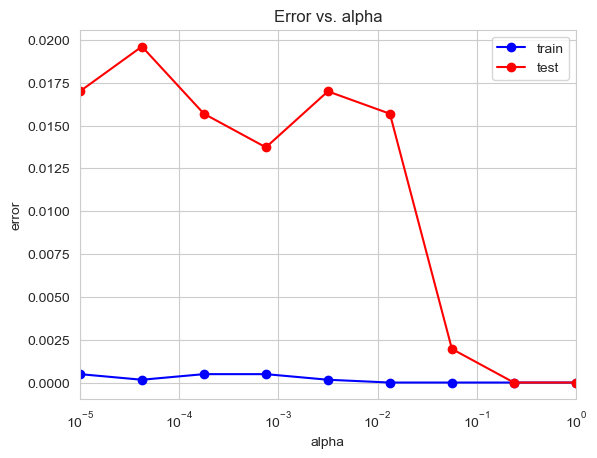

In [29]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')

plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

plt.xlim([np.min(alpha_arr), np.max(alpha_arr)]);

In [30]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

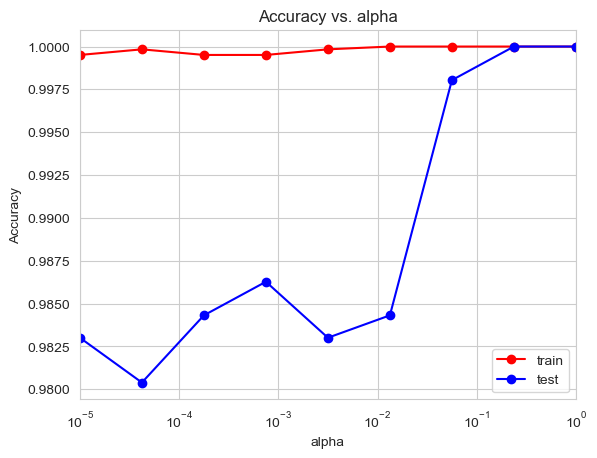

In [31]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


In [33]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.23713737 1.        ]


In [34]:
alpha_opt = alpha_opt[1]

Классификатор при найденном оптимальном значении alpha:
Повторим обучение:

In [35]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[442   0   0]
 [  0 374   0]
 [  0   0 714]]


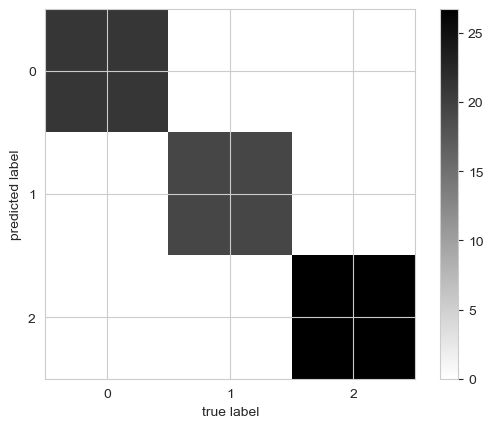

In [37]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [38]:
print("train error = ", np.mean(y_train != y_train_pred))
print("test error  = ", np.mean(y_test != y_test_pred))
print()
print("f1_score for train = ", f1_score(np.array(y_train), y_train_pred, average='macro'))
print("f1_score for test  = ", f1_score(np.array(y_test), y_test_pred, average='macro'))

train error =  0.0
test error  =  0.0

f1_score for train =  1.0
f1_score for test  =  1.0


# Вывод

В результате проделанной работы была обучена полносвязная нейронной сеть. Построен график зависимостей метрики от гиперпараметра.
Можно сделать следующие выводы:
1. Алгоритм одинаково отлично показал себя на тестовой и обучемой выборках 
2. Получен оптимальное значение гиперпараметров альфа. Значение минимальной погрешности на тестовом образце составляет 0.
3. Такие идеальные показатели могут говорить о малой выборке данных
4. Результаты сильно отличаются от результатов методом KNN.